# Comparative Analysis of Market Mood Index vs NIFTY Index

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'data/MMI_09-Jun-2024.csv'
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.columns = [col.strip() for col in data.columns]

data.head()

,Date,Market Mood Index,Nifty Index
0,2024-06-07,51.525161,23290.15
1,2024-06-06,43.454809,22821.40
2,2024-06-05,35.283719,22620.35
3,2024-06-04,48.996059,21884.50
4,2024-06-03,59.844635,23263.90


## Event Analysis

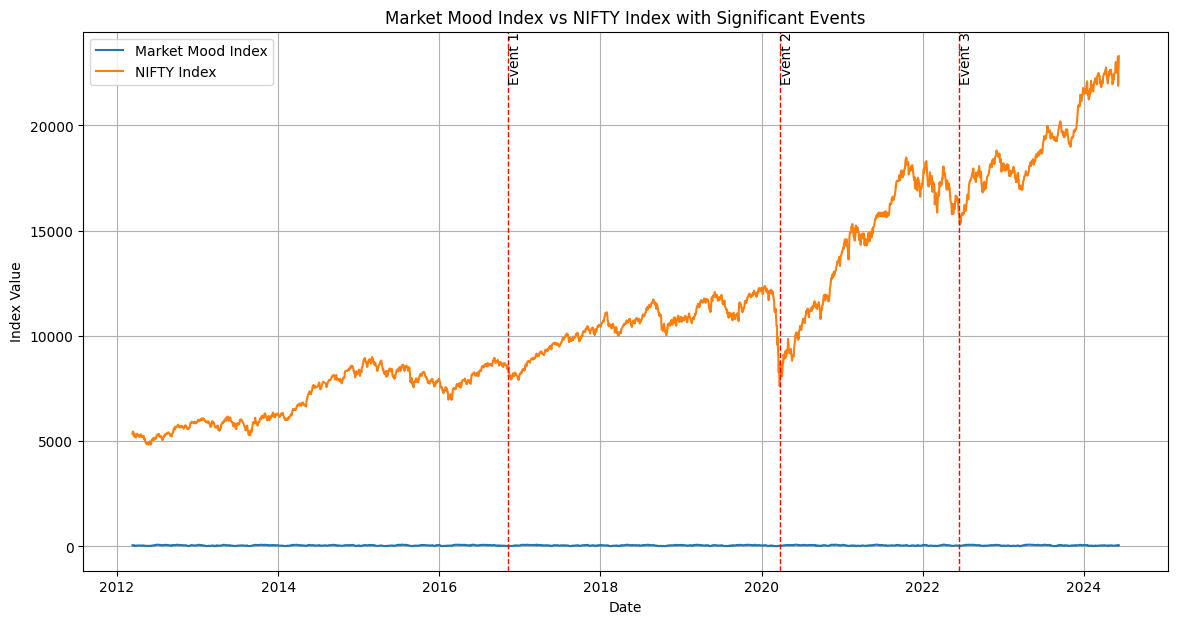

In [2]:
events = {
    'Event 1': '2016-11-08',
    'Event 2': '2020-03-24',
    'Event 3': '2022-06-14'
}

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Market Mood Index'], label='Market Mood Index')
plt.plot(data['Date'], data['Nifty Index'], label='NIFTY Index')

for event, date in events.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', linewidth=1)
    plt.text(pd.to_datetime(date), plt.ylim()[1], event, rotation=90, verticalalignment='top')

plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('Market Mood Index vs NIFTY Index with Significant Events')
plt.legend()
plt.grid(True)
plt.show()

## Volatility Analysis

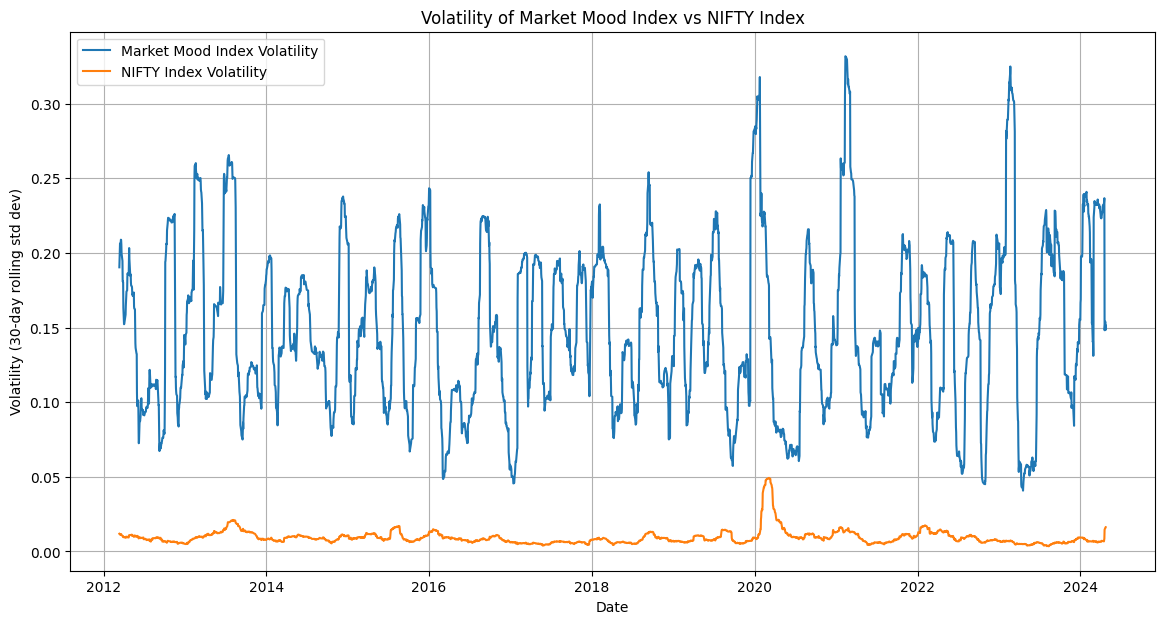

In [3]:
data['MMI_Returns'] = data['Market Mood Index'].pct_change()
data['NIFTY_Returns'] = data['Nifty Index'].pct_change()

data['MMI_Volatility'] = data['MMI_Returns'].rolling(window=30).std()
data['NIFTY_Volatility'] = data['NIFTY_Returns'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['MMI_Volatility'], label='Market Mood Index Volatility')
plt.plot(data['Date'], data['NIFTY_Volatility'], label='NIFTY Index Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (30-day rolling std dev)')
plt.title('Volatility of Market Mood Index vs NIFTY Index')
plt.legend()
plt.grid(True)
plt.show()